### Project 1 
## STAT 5474 - Intro to Data Mining
## Daniel Bell
## Wednesday, February 12th, 2020

In [1]:
import io
import requests
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
from pandas_profiling import ProfileReport

%matplotlib inline

#### 1. (Data Input)

In [2]:
# Importing Dataset
## Create empty dataframe
df = pd.DataFrame()
## Create date range for months of the year 2019 to be used in building URL
months = pd.date_range('1/1/2019','1/1/2020',freq="M").strftime('%Y%m')
## Iterate over each month and create a URL for that month, pull the csv data
## and append that data to the dataframe
for m in months:
    URL = "http://www.bom.gov.au/climate/dwo/" + m + "/text/IDCJDW2801." + m + ".csv"
    ## Use request module as pandas native read_csv throws 403 error due to lack of headers
    r = requests.get(URL).text
    df = df.append(pd.read_csv(io.StringIO(r), sep=",", skiprows=6))
## Set the "Date" column to Datetime type
df["Date"] = pd.to_datetime(df["Date"])
## Set the "Date" column to Datetime index
df = df.set_index("Date")
## Use index to create month column using "Unnamed: 0" column
df["Unnamed: 0"] = df.index.strftime("%b")
## Rename column to "Month"
df.rename(columns = {"Unnamed: 0": "Month"}, inplace = True)

In [3]:
# Shape of our data (353, 21) or 365 observations with 21 variables 
# Because I've changed the "Date" column to be an index it is not included
# in the count of variables. 
print(df.shape)
df

(365, 21)


Month  Minimum temperature (°C)  Maximum temperature (°C)  \
Date                                                                   
2019-01-01   Jan                      13.7                      35.3   
2019-01-02   Jan                      18.0                      35.9   
2019-01-03   Jan                      18.4                      35.3   
2019-01-04   Jan                      17.2                      38.1   
2019-01-05   Jan                      21.1                      36.7   
...          ...                       ...                       ...   
2019-12-27   Dec                      15.3                      36.8   
2019-12-28   Dec                      17.1                      37.7   
2019-12-29   Dec                      19.6                      36.1   
2019-12-30   Dec                      17.6                      39.8   
2019-12-31   Dec                      19.8                      38.0   

            Rainfall (mm)  Evaporation (mm)  Sunshine (hours)  \
Date                                                            
2019-01-01            0.0               NaN               NaN   
2019-01-02            0.0               NaN               NaN   
2019-01-03            0.0               NaN               NaN   
2019-01-04            0.0               NaN               NaN   
2019-01-05            0.0               NaN               NaN   
...                   ...               ...               ...   
2019-12-27            0.0               NaN               NaN   
2019-12-28            0.0               NaN               NaN   
2019-12-29            0.0               NaN               NaN   
2019-12-30            0.0               NaN               NaN   
2019-12-31            0.0               NaN               NaN   

           Direction of maximum wind gust   Speed of maximum wind gust (km/h)  \
Date                                                                            
2019-01-01                               E                                 35   
2019-01-02                             ENE                                 52   
2019-01-03                              NE                                 37   
2019-01-04                              NW                                 46   
2019-01-05                             NNW                                 74   
...                                    ...                                ...   
2019-12-27                               E                                 43   
2019-12-28                              NW                                 52   
2019-12-29                             WNW                                 33   
2019-12-30                              NW                                 56   
2019-12-31                              NW                                 74   

           Time of maximum wind gust  9am Temperature (°C)  ...  \
Date                                                        ...   
2019-01-01                     19:21                  23.8  ...   
2019-01-02                     17:01                  25.1  ...   
2019-01-03                     19:10                  23.4  ...   
2019-01-04                     12:43                  26.2  ...   
2019-01-05                     12:40                  31.1  ...   
...                              ...                   ...  ...   
2019-12-27                     18:05                  23.0  ...   
2019-12-28                     12:47                  25.0  ...   
2019-12-29                     15:55                  27.0  ...   
2019-12-30                     13:48                  25.7  ...   
2019-12-31                     09:32                  31.6  ...   

            9am cloud amount (oktas)  9am wind direction  \
Date                                                       
2019-01-01                       NaN                 NNW   
2019-01-02                       NaN                 NNW   
2019-01-03                       7.0                 ESE   
20

#### 2. (Data Cleaning and Preperation)

##### (a)

To view the variables that have an inconsistent data type, I use pandas_profiling module which produce an easy to read html report of the data variables and many useful characteristics of the data. The report can be viewed via the html version hosted on my personal github. 

In [4]:
#for col in df.columns:
#    print(df[col].value_counts())
profile = ProfileReport(df, title = "2019 Canberra, Australia Weather Data", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

##### (b)

In [5]:
# Drop "Time of maximum wind gust"
df.drop(columns="Time of maximum wind gust", inplace = True)

##### (c)

In [6]:
# Rename variables
df.rename(columns = {"Minimum temperature (°C)":"MinTemp",
                    "Maximum temperature (°C)":"MaxTemp",
                    "Rainfall (mm)":"Rainfall",
                    "Evaporation (mm)":"Evaporation",
                    "Sunshine (hours)":"Sunshine",
                    "Direction of maximum wind gust ":"WindGustDir",
                    "Speed of maximum wind gust (km/h)":"WindGustSpeed",
                    "9am Temperature (°C)":"Temp9am",
                    "9am relative humidity (%)":"Humidity9am",
                    "9am cloud amount (oktas)":"Cloud9am",
                    "9am wind direction":"WindDir9am",
                    "9am wind speed (km/h)":"WindSpeed9am",
                    "9am MSL pressure (hPa)":"Pressure9am",
                    "3pm Temperature (°C)":"Temp3pm",
                    "3pm relative humidity (%)":"Humidity3pm",
                    "3pm cloud amount (oktas)":"Cloud3pm",
                    "3pm wind direction":"WindDir3pm",
                    "3pm wind speed (km/h)":"WindSpeed3pm",
                    "3pm MSL pressure (hPa)":"Pressure3pm"}, inplace = True)

In [7]:
# Shape of data is one less than if we were to look at it in R
# this is because I am treating the "Date" column as an index
df.shape

(365, 20)

In [8]:
df.columns

Index(['Month', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'Temp9am', 'Humidity9am', 'Cloud9am',
       'WindDir9am', 'WindSpeed9am', 'Pressure9am', 'Temp3pm', 'Humidity3pm',
       'Cloud3pm', 'WindDir3pm', 'WindSpeed3pm', 'Pressure3pm'],
      dtype='object')

##### (d)

In [9]:
df

Month  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                  
2019-01-01   Jan     13.7     35.3       0.0          NaN       NaN   
2019-01-02   Jan     18.0     35.9       0.0          NaN       NaN   
2019-01-03   Jan     18.4     35.3       0.0          NaN       NaN   
2019-01-04   Jan     17.2     38.1       0.0          NaN       NaN   
2019-01-05   Jan     21.1     36.7       0.0          NaN       NaN   
...          ...      ...      ...       ...          ...       ...   
2019-12-27   Dec     15.3     36.8       0.0          NaN       NaN   
2019-12-28   Dec     17.1     37.7       0.0          NaN       NaN   
2019-12-29   Dec     19.6     36.1       0.0          NaN       NaN   
2019-12-30   Dec     17.6     39.8       0.0          NaN       NaN   
2019-12-31   Dec     19.8     38.0       0.0          NaN       NaN   

           WindGustDir  WindGustSpeed  Temp9am  Humidity9am  Cloud9am  \
Date                                                                    
2019-01-01           E             35     23.8           49       NaN   
2019-01-02         ENE             52     25.1           57       NaN   
2019-01-03          NE             37     23.4           64       7.0   
2019-01-04          NW             46     26.2           51       NaN   
2019-01-05         NNW             74     31.1           36       NaN   
...                ...            ...      ...          ...       ...   
2019-12-27           E             43     23.0           48       NaN   
2019-12-28          NW             52     25.0           42       8.0   
2019-12-29         WNW             33     27.0           32       6.0   
2019-12-30          NW             56     25.7           33       8.0   
2019-12-31          NW             74     31.6           14       NaN   

           WindDir9am WindSpeed9am  Pressure9am  Temp3pm  Humidity3pm  \
Date                                                                    
2019-01-01        NNW            4       1012.7     33.7           26   
2019-01-02        NNW            4       1011.1     33.8           24   
2019-01-03        ESE            6       1013.4     32.3           32   
2019-01-04         NW            2       1013.2     36.3           24   
2019-01-05         NW           30       1008.6     32.6           29   
...               ...          ...          ...      ...          ...   
2019-12-27         SE            7       1019.5     35.4           18   
2019-12-28         SW            4       1018.1     35.6           13   
2019-12-29        WSW            6       1017.4     34.0           18   
2019-12-30        ESE            7       1015.1     38.5            8   
2019-12-31        NNW           33       1007.7     36.7            9   

            Cloud3pm WindDir3pm WindSpeed3pm  Pressure3pm  
Date                                                       
2019-01-01       NaN          W           17       1009.1  
2019-01-02       NaN        WNW           26       1007.7  
2019-01-03       NaN         NE           11       1009.8  
2019-01-04       2.0        WNW           20       1008.8  
2019-01-05       8.0        WNW           35       1004.9  
...              ...        ...          ...          ...  
2019-12-27       NaN        NNW           17       1015.0  
2019-12-28       NaN        WNW           26       1014.3  
2019-12-29       7.0          W           17       1015.3  
2019-12-30       1.0         NW           30       1009.9  
2019-12-31       8.0         NW           35       1005.4  

[365 rows x 20 columns]

In [10]:
# Replace all instances of "Calm" with numeric "0"
df.replace("Calm",0, inplace = True)

In [12]:
# Current types of variables. 
df.dtypes

Month             object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
Temp9am          float64
Humidity9am        int64
Cloud9am         float64
WindDir9am        object
WindSpeed9am      object
Pressure9am      float64
Temp3pm          float64
Humidity3pm        int64
Cloud3pm         float64
WindDir3pm        object
WindSpeed3pm      object
Pressure3pm      float64
dtype: object

In [13]:
# Change types of variables to an appropriate type
df[["WindGustSpeed","Cloud9am","Cloud3pm",
    "WindSpeed9am","WindSpeed3pm"]]  = df[["WindGustSpeed","Cloud9am","Cloud3pm","WindSpeed9am","WindSpeed3pm"]].apply(pd.to_numeric)
df[["Month","WindGustDir","WindDir9am","WindDir3pm"]] = df[["Month","WindGustDir","WindDir9am","WindDir3pm"]].astype("category")

In [14]:
df.dtypes

Month            category
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir      category
WindGustSpeed       int64
Temp9am           float64
Humidity9am         int64
Cloud9am          float64
WindDir9am       category
WindSpeed9am        int64
Pressure9am       float64
Temp3pm           float64
Humidity3pm         int64
Cloud3pm          float64
WindDir3pm       category
WindSpeed3pm        int64
Pressure3pm       float64
dtype: object

##### (e)

In [15]:
# Define new binary variable "RainToday" that is 1 if rain was more than 1mm and 0 otherwise
df["RainToday"] = df["Rainfall"].apply(lambda x: 1 if x > 1 else 0)
# Define new binary variable "RainTomorrow" that is the 1-day shifted copy of "RainToday"
df["RainTomorrow"] = df["RainToday"].shift(periods=1, fill_value=0)

##### (f)

In [17]:
# Save a csv of cleaned data which can be read in via R 
df.to_csv("project_1.csv")

#### 3. (Exploratory Data Analysis)

In [18]:
# Provided example 
m_r = pd.crosstab(df["Month"], columns=df["RainTomorrow"])
m_r

RainTomorrow   0   1
Month               
Apr           28   2
Aug           26   5
Dec           31   0
Feb           24   4
Jan           21  10
Jul           29   2
Jun           27   3
Mar           28   3
May           25   6
Nov           29   1
Oct           27   4
Sep           27   3

In [19]:
# Chisquare test for Month and RainTomorrow
# p-value: 0.017 hence at sig. level 0.05 no independence
ss.chi2_contingency(m_r)

(23.105811113381712,
 0.017077520910023365,
 11,
 array([[26.46575342,  3.53424658],
        [27.34794521,  3.65205479],
        [27.34794521,  3.65205479],
        [24.70136986,  3.29863014],
        [27.34794521,  3.65205479],
        [27.34794521,  3.65205479],
        [26.46575342,  3.53424658],
        [27.34794521,  3.65205479],
        [27.34794521,  3.65205479],
        [26.46575342,  3.53424658],
        [27.34794521,  3.65205479],
        [26.46575342,  3.53424658]]))

As an initial investigation into the cleaned dataset, I again create a profile report using pandas_profiling module:

In [20]:
profile = ProfileReport(df, title = "Project 1 - 2019 Canberra, Australia Weather Data", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

##### 1) First Observation

The first observation that I made was born from a question that I had regarding days with constant temperatures. I wondered if days with more constant temperature (this I defined as the difference between maximum temperature and minimum temperature) depended on the month of the year. In otherwords, do days with small differences in max and min temperatures depend on the time of the year in Canberra, Australia.

First we can look at the average difference between max and min temperatures for each month, as summerized below. The "Date" column is a numer representation of the month of the year. The floating point value in the second column is the average max-min temperature difference for the given month. 

In [21]:
# Create new variable "MinMaxDiff" 
df["MinMaxDiff"] = df["MaxTemp"] - df["MinTemp"]
# Show average "MinMaxDiff" for each month
df.groupby(df.index.month)["MinMaxDiff"].mean()

Date
1     16.806452
2     16.232143
3     14.006452
4     15.150000
5     13.248387
6     14.143333
7     13.006452
8     14.070968
9     16.640000
10    17.387097
11    17.340000
12    18.590323
Name: MinMaxDiff, dtype: float64

From initial observation, it looks like constant temperature does depend on the month of the year. In other words, the data seems to suggest that during the winter months in Canberra Australia, there is a more constant temperature or a smaller difference between the max and min temperature for the day. 

To test this, we can use an One-Way ANOVA test. In order for the ANOVA test to be valid we must check the assumption that the population of max-min differences is normally distributed as well as homogeneity of variances.  

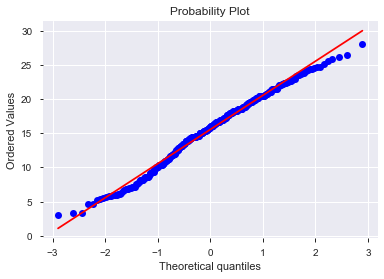

In [22]:
# Q-Q Plot for normality check
ss.probplot(df["MinMaxDiff"],plot=plt);

The above Q-Q plot shows that the population data is relatively normal. With real world data, it is hard to observe absolute normal distributions and for this purpose I assume that normality holds true. 

In [23]:
# Levene's test for homogeneity of variance
ss.levene(df[df["Month"]=="Jan"]["MinMaxDiff"], df[df["Month"]=="Feb"]["MinMaxDiff"],df[df["Month"]=="Mar"]["MinMaxDiff"],
           df[df["Month"]=="Apr"]["MinMaxDiff"],df[df["Month"]=="May"]["MinMaxDiff"],df[df["Month"]=="Jun"]["MinMaxDiff"],
           df[df["Month"]=="Jul"]["MinMaxDiff"],df[df["Month"]=="Aug"]["MinMaxDiff"],df[df["Month"]=="Sep"]["MinMaxDiff"],
           df[df["Month"]=="Oct"]["MinMaxDiff"],df[df["Month"]=="Nov"]["MinMaxDiff"],df[df["Month"]=="Dec"]["MinMaxDiff"])

LeveneResult(statistic=1.6636502415482504, pvalue=0.08003041680109223)

To test for homogeneity of variances, I have used Levene's test and passed all variables into to verify equal variances. We can see with a p-value more than significance level 0.05 we can not reject the null and therefore assume homogeneity of variance. 

In [24]:
ss.f_oneway(df[df["Month"]=="Jan"]["MinMaxDiff"], df[df["Month"]=="Feb"]["MinMaxDiff"],df[df["Month"]=="Mar"]["MinMaxDiff"],
           df[df["Month"]=="Apr"]["MinMaxDiff"],df[df["Month"]=="May"]["MinMaxDiff"],df[df["Month"]=="Jun"]["MinMaxDiff"],
           df[df["Month"]=="Jul"]["MinMaxDiff"],df[df["Month"]=="Aug"]["MinMaxDiff"],df[df["Month"]=="Sep"]["MinMaxDiff"],
           df[df["Month"]=="Oct"]["MinMaxDiff"],df[df["Month"]=="Nov"]["MinMaxDiff"],df[df["Month"]=="Dec"]["MinMaxDiff"])

F_onewayResult(statistic=4.682522022289606, pvalue=1.077823783652951e-06)

Finally, we perform the One-way ANOVA test. We can see from the very small p-value that is significantly less than significance level 0.05, suggests that the difference in max-min temperatures does indeed depend on the month of the year. If we take the max-min difference to imply more constant temperatures, then we can make the argument that consistency of temperature in Canberra, Australia depends on the month of the year. 

##### 2) Second Observation

The second observation between the relationship of humidity and the likelihood of rain tomorrow. There are two parts to this as our dataset has two measurements of humidity taken at 9am and 3pm. I will look at humidity measured at 9am. 

Also, as humidity in our dataset is measured as a continous variable, I needed to discretize humidity to be able to perform the chisquare test. I do so by splitting humidity measures equally into 10 groups. Generally, this creates bins of the same size spanning from the minimum measured humidity level to 100 (the maximum observed/posible humidity).  

###### Humidity9am

In [25]:
# Create cross table between "Humidity9am" and "RainTomorrow"
x = pd.crosstab(pd.cut(df["Humidity9am"],10),df["RainTomorrow"])
x

RainTomorrow     0   1
Humidity9am           
(13.914, 22.6]   5   0
(22.6, 31.2]     8   0
(31.2, 39.8]    16   1
(39.8, 48.4]    29   4
(48.4, 57.0]    42   2
(57.0, 65.6]    48   5
(65.6, 74.2]    64  11
(74.2, 82.8]    30   7
(82.8, 91.4]    37   9
(91.4, 100.0]   43   4

In [26]:
ss.chi2_contingency(x)

(10.386648102350929,
 0.3200998040476309,
 9,
 array([[ 4.4109589 ,  0.5890411 ],
        [ 7.05753425,  0.94246575],
        [14.99726027,  2.00273973],
        [29.11232877,  3.88767123],
        [38.81643836,  5.18356164],
        [46.75616438,  6.24383562],
        [66.16438356,  8.83561644],
        [32.64109589,  4.35890411],
        [40.58082192,  5.41917808],
        [41.4630137 ,  5.5369863 ]]))

For "Humidity9am" you can see that there is very little variation in the liklihood of raining due to the humidity measured at 9am. This is seen by the large p-value of 0.32 which is greater than our significance level 0.05 and suggests that there is little evidence against the null hypothesis. I.e. the variables are independent. 

##### 3) Third Observation

###### Humidity3pm

Even though in the previous observation we saw independence between the two variables, I thought it might be interesting to see if that result held for humidity measured at 3pm. 

I perform the same steps as above for "Humidity3pm"

In [27]:
# Create cross table between "Humidity3pm" and "RainTomorrow"
x = pd.crosstab(pd.cut(df["Humidity3pm"],10),df["RainTomorrow"])
x

RainTomorrow    0   1
Humidity3pm          
(5.912, 14.8]  25   0
(14.8, 23.6]   39   1
(23.6, 32.4]   70   9
(32.4, 41.2]   54   3
(41.2, 50.0]   55  11
(50.0, 58.8]   43   8
(58.8, 67.6]   19   9
(67.6, 76.4]    8   2
(76.4, 85.2]    8   0
(85.2, 94.0]    1   0

In [28]:
ss.chi2_contingency(x)

(24.281379173904547,
 0.003877936652583459,
 9,
 array([[22.05479452,  2.94520548],
        [35.28767123,  4.71232877],
        [69.69315068,  9.30684932],
        [50.28493151,  6.71506849],
        [58.22465753,  7.77534247],
        [44.99178082,  6.00821918],
        [24.70136986,  3.29863014],
        [ 8.82191781,  1.17808219],
        [ 7.05753425,  0.94246575],
        [ 0.88219178,  0.11780822]]))

Suprisingly, perhaps, from the above chisquared test we see that there is a potential relationship between the likelihood of rain and humidity measured at 3pm. The p-value of 0.0038 is less than our significance level 0.05 and therefore we reject the null hypothesis and conclude that there is variation of rain chances with humidity measured at 3pm. 

This is opposed to the result that we obtained with humidity measured at 9am and might give us some intuition into the overall relationship between humidity and rain chances. In otherwords, the data suggest that rain chances are dependent on humidty measurements later in the day. This may seem intuitive as these measurments are temporally closer to the new day. 